In [10]:
import os
import sys
import numpy as np
from utils import get_flows, get_single_flow
sys.path.append("..")
BaselineSet = sorted(os.listdir('../Baselines/'))
print("Baseline Set: ", BaselineSet)
TargetBaseline = BaselineSet[9]
print("Target Baseline: ", TargetBaseline)
TargetDir = "../Baselines/" + TargetBaseline + "/ECNs_results/"

from Modules.LoadData.load_data_ADNI import get_labels
df = get_labels(parent=2)
switcher = {
    "CN": 1,
    "LMCI": 2,
    "EMCI": 3,
    "MCI": 4,
    "SMC": 5
}
reversed_switcher = {v: k for k, v in switcher.items()}

Baseline Set:  ['00-KendallCorrelations', '00-PearsonCorrelations', '00-SpearmanCorrelations', '18-NOTEARS', '18-NRI', '19-DAGGNN', '96-reverse-beta1e-2', '97-reverse-beta1e-1', '98-reverse-beta1e-1', '99-reverse']
Target Baseline:  99-reverse


In [7]:
# # 计算每组的平均矩阵，无需重复运行

# # average = np.zeros([6,90,90,187])
# average = np.zeros([6,90,90])
# num = np.zeros([6])
# for row in df.itertuples():
#     path = TargetDir + row.id + "_" + row.group + ".npy"
#     a = np.load(path)
#     average[switcher[row.group]] += np.average(a,axis=2)
#     # average[switcher[row.group]] += a
#     num[switcher[row.group]] += 1

# for i in range(1,6):
#     average1 = average[i]/num[i]
#     np.save(TargetDir + "average"+ str(i)+".npy", average1)

# print(num)

[ 0. 87. 23. 77. 88. 42.]


Group1:  LMCI 
Group2:  EMCI
Lobes:  ['Frontal' 'Insula' 'Limbic' 'Occipital' 'Parietal' 'SCGM' 'Temporal']


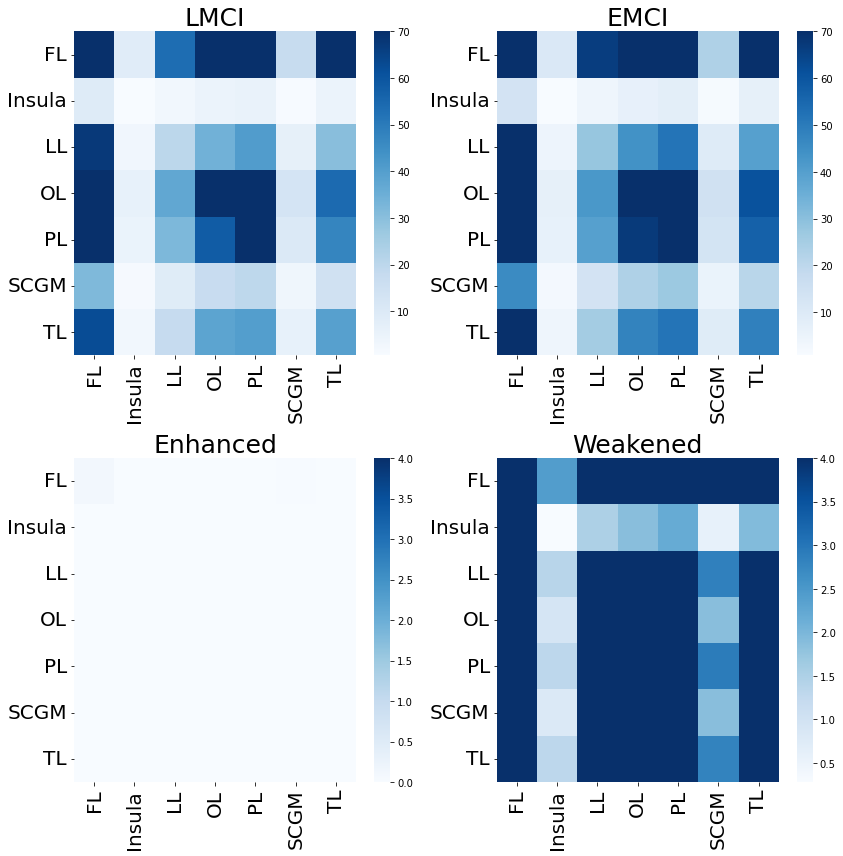

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
TargetGroups = [2,3]
Groups = {}
Groups[0] = reversed_switcher[TargetGroups[0]]
Groups[1] = reversed_switcher[TargetGroups[1]]
Causalities={}
Causalities[0] = np.load(TargetDir + "average"+ str(TargetGroups[0])+".npy")
Causalities[1] = np.load(TargetDir + "average"+ str(TargetGroups[1])+".npy")
print("Group1: ",Groups[0],"\nGroup2: ",Groups[1])
df = pd.read_csv('atlas/aal90_data.csv')
lobes = df['lobe'].values
AllLobes = df['lobe'].unique()
AllLobesShorts = ['FL', 'Insula', 'LL', 'OL', 'PL', 'SCGM', 'TL']
print('Lobes: ', AllLobes)
Flows = get_flows(AllLobes, lobes, Causalities,threshold=0.01, weighted=True)
matrix = Causalities[0]-Causalities[1]
positive_matrix = np.zeros_like(matrix)
negative_matrix = np.zeros_like(matrix)
positive_matrix[matrix > 0] = matrix[matrix > 0]
negative_matrix[matrix < 0] = matrix[matrix < 0]
negative_matrix = -negative_matrix
Flow_diff={}
Flow_diff_Groups = ['Enhanced','Weakened']
Flow_diff[0] = get_single_flow(AllLobes, lobes, positive_matrix,threshold=0, weighted=True)
Flow_diff[1] = get_single_flow(AllLobes, lobes, negative_matrix,threshold=0, weighted=True)
cmaps = ['Blues','Blues','Blues','Blues']
# 创建一个包含6个子图的图形
fig, axes = plt.subplots(2,2 , figsize=(12,12))

# 绘制每个矩阵的热力图
for i, ax in enumerate(axes.flat):
    if i<2:
        sns.heatmap(data=Flows[i], cmap=cmaps[i], vmax=70, ax=ax)
        ax.set_yticklabels(AllLobesShorts, rotation=0, fontsize=20)
        ax.set_xticklabels(AllLobesShorts, rotation=90, fontsize=20)
        ax.set_title(Groups[i], fontsize=25)
    else:
        sns.heatmap(data=Flow_diff[i-2], cmap=cmaps[i],vmax=4, ax=ax)
        ax.set_yticklabels(AllLobesShorts, rotation=0, fontsize=20)
        ax.set_xticklabels(AllLobesShorts, rotation=90, fontsize=20)
        ax.set_title(Flow_diff_Groups[i-2], fontsize=25)


plt.tight_layout()
plt.savefig('Enhanced_Weakened.pdf')
# 显示图形
plt.show()
# print(Flows)